In [66]:
import pandas as pd
import seaborn as sns
import numpy as np
import statistics
import matplotlib.pyplot as plt

In [102]:
df = pd.read_csv('student-mat.csv')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


1. **school** - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
2. **sex** - student's sex (binary: 'F' - female or 'M' - male)
3. **age** - student's age (numeric: from 15 to 22)
4. **address** - student's home address type (binary: 'U' - urban or 'R' - rural)
5. **famsize** - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
6. **Pstatus** - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
7. **Medu** - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
8. **Fedu** - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
9. **Mjob** - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
10. **Fjob** - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
11. **reason** - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
12. **guardian** - student's guardian (nominal: 'mother', 'father' or 'other')
13. **traveltime** - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. **studytime** - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. **failures** - number of past class failures (numeric: n if 1<=n<3, else 4)
16. **schoolsup** - extra educational support (binary: yes or no)
17. **famsup** - family educational support (binary: yes or no)
18. **paid** - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19. **activities** - extra-curricular activities (binary: yes or no)
20. **nursery** - attended nursery school (binary: yes or no)
21. **higher** - wants to take higher education (binary: yes or no)
22. **internet** - Internet access at home (binary: yes or no)
23. **romantic** - with a romantic relationship (binary: yes or no)
24. **famrel** - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. **freetime** - free time after school (numeric: from 1 - very low to 5 - very high)
26. **goout** - going out with friends (numeric: from 1 - very low to 5 - very high)
27. **Dalc** - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. **Walc** - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. **health** - current health status (numeric: from 1 - very bad to 5 - very good)
30. **absences** - number of school absences (numeric: from 0 to 93)

these grades are related with the course subject, Math:

31. **G1** - first period grade (numeric: from 0 to 20)
31. **G2** - second period grade (numeric: from 0 to 20)
32. **G3** - final grade (numeric: from 0 to 20, output target)

In [13]:
# rows and columns count
df.shape 

(395, 33)

In [14]:
# check coulmn data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [15]:
df[['age', 'absences', 'G1', 'G2', 'G3']].describe()

,age,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,5.708861,10.908861,10.713924,10.415190
std,1.276043,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,75.000000,19.000000,19.000000,20.000000


In [16]:
# check for any duplicate records in the data
df.duplicated().sum()

0

### Principal Component Analysis (PCA) for G1, G2 and G3 columns

it appears to me that the first semester, the second semester and final grades
1. correlate, and
2. can be replaced by 1 variable 

lets check my assumtions 

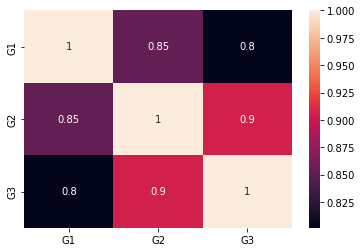

In [71]:
correlation_mat = grades.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

In [40]:
grades = df[['G1', 'G2', 'G3']]

samle_variances = [statistics.variance(grades['G1']), statistics.variance(grades['G2']), statistics.variance(grades['G3'])]

print('G1 variance =', samle_variances[0])
print('G2 variance =', samle_variances[1])
print('G3 variance =', samle_variances[2])

print('total variance =', sum(samle_variances))

G1 variance = 11.017053267364904
G2 variance = 14.148917303861724
G3 variance = 20.989616397866737
total variance = 46.15558696909336


In [49]:
# if we divide individual variances by the total variance, we’ll see how much variance each variable explains:
samle_variances_explained = [round((elem /sum(samle_variances))*100) for elem in samle_variances]
samle_variances_explained

[24, 31, 45]

In [51]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
pca.fit(grades)
print(pca.explained_variance_)
grades_pca = pca.transform(grades)

[41.97661551  2.84406078  1.33491068]


In [53]:
# sum is the same as for the original variables
sum(pca.explained_variance_)

46.155586969093356

<br/><br/>

in PC-1 G1 column mades the biggest (although not much bigger than G2 and G3):

In [97]:
pd.DataFrame(pca.components_,columns=grades.columns,index = ['PC-1','PC-2', 'PC-3'])

,G1,G2,G3
PC-1,-0.565361,-0.588710,-0.577744
PC-2,0.796218,-0.206582,-0.568649
PC-3,-0.215418,0.781501,-0.585535


<br/><br/>

Turned out PC1 explains 91% of variance.

In [61]:
sample_variances_pca = list(pca.explained_variance_)
sample_variances_pca_explained = [round((elem / sum(sample_variances_pca))*100) for elem in sample_variances_pca]
sample_variances_pca_explained

[91, 6, 3]

<br/><br/>

So lest denormalize the data and replace G1, G2, G3 with single PC1 value

In [104]:
# denormalizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
grades_scaled = scaler.fit_transform(grades)
PC_one = scaler.inverse_transform(grades_pca)

# taking PC1 
new_variable = PC_one[:, 0]

In [103]:
df_reduced = df.drop(['G1', 'G2', 'G3'], axis=1)
df_reduced.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,1,1,3,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,1,1,3,4
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,2,3,3,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,1,1,5,2
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,1,2,5,4


In [107]:
df_reduced['grade'] = new_variable
df_reduced.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,18.546364
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,19.065849
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,14.702403
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,4.969773
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,14.228795


<br/><br/>